What is a Random Forest? 
- Combines multiple decision trees to form a predictive ML model
- Supervised ML model
- Can help predict classification or continuous data (regression)

Hyperparameters to know: 
- n_estimators: Number of trees in the forest (higher = more stability but slower training).
- max_depth: Maximum depth of each decision tree (prevents overfitting).
- min_samples_split: Minimum samples required to split a node (higher = simpler trees).
- max_features: Number of features considered for each split (controls randomness).
- random_state: Ensures reproducibility.

In [60]:
import pandas as pd
import sklearn.ensemble as sk
import seaborn as sns
import matplotlib.pyplot as plt  
df = pd.read_csv("synthetic_ph_dataset_300.csv")

In [61]:
df.head()

,Age,Sex,BMI,Systolic BP,Diabetes,Heart Disease,COPD,Oxygen Saturation,PH Diagnosis
0,69,0,23.287056,179,0,1,1,96.236057,1
1,32,0,26.246573,102,1,0,1,95.282073,1
2,89,1,26.622592,151,1,0,1,96.011880,1
3,78,0,33.376466,171,1,0,1,96.980707,1
4,38,1,29.444921,178,1,0,1,91.298119,0


In [62]:
X = df.iloc[: 0:300]

In [63]:
y = df.iloc[1, 8]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df.drop('PH Diagnosis', axis=1)
y = df['PH Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred = rf.predict (X_test)

In [70]:
rf.score(X_test, y_test)

0.9166666666666666

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.94      0.96      0.95        47

    accuracy                           0.92        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.91      0.92      0.92        60



In [73]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [74]:
features.head(8)

,0
Age,0.297283
Sex,0.021348
BMI,0.121250
Systolic BP,0.107963
Diabetes,0.016500
Heart Disease,0.287172
COPD,0.026551
Oxygen Saturation,0.121934


In [ ]:
#hyperparameters to make the model more accurate 

rf2 = RandomForestClassifier(n_estimators=1000,
                             criterion = "entropy",
                             min_samples_split = 10,
                             max_depth = 14,
                             random_state= 42)

In [76]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [77]:
rf2.score(X_test, y_test)

0.9

In [78]:
y_pred2 = rf2.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        47

    accuracy                           0.90        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.90      0.90      0.90        60



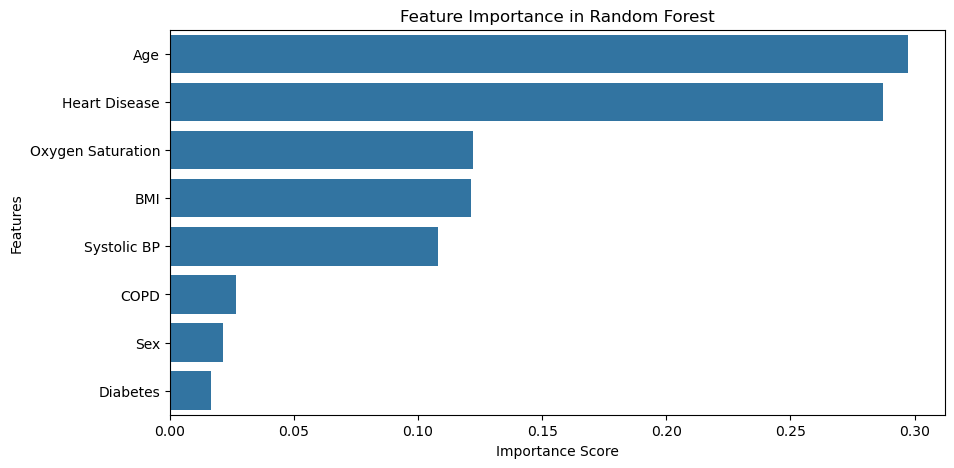

In [84]:
# Get the feature importance scores from the Random Forest model
feature_importance = rf.feature_importances_

# Create a DataFrame to pair the feature importance with feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)


# Plot the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

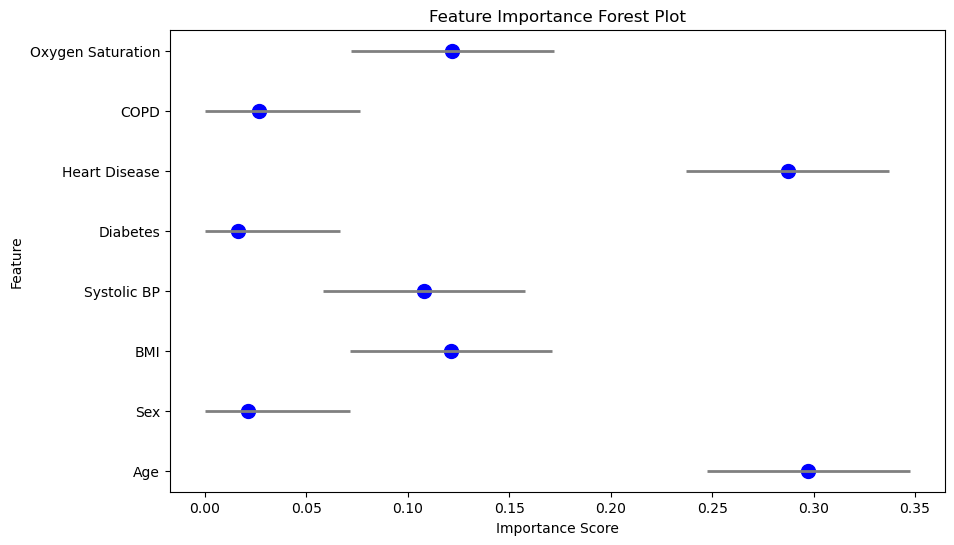

In [87]:
import numpy as np

ci_lower = np.maximum(0, importance_df['Importance'] - 0.05)  # Simple lower bound
ci_upper = importance_df['Importance'] + 0.05  # Simple upper bound

# Plot the Forest Plot
plt.figure(figsize=(10, 6))

# Create horizontal lines for each feature
plt.hlines(y=importance_df.index, xmin=ci_lower, xmax=ci_upper, color='gray', linewidth=2)

# Plot the actual importance values as dots
plt.scatter(importance_df['Importance'], importance_df.index, color='blue', label='Importance', s=100)

# Add labels and title
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Forest Plot')
plt.yticks(ticks=importance_df.index, labels=importance_df['Feature'])
plt.show()